In [6]:
# ETL
# Extract
# Transform
# Load
import pandas

In [25]:
data = pandas.read_csv("openbeerdb_csv/beers.csv", low_memory=False, usecols=["name", "abv"], nrows=100)

In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
dir(data)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

In [28]:
data["abv"] = data["abv"].astype(float)

In [29]:
data

,name,abv
0,Hocus Pocus,4.5
1,Grimbergen Blonde,6.7
2,Widdershins Barleywine,9.1
3,Lucifer,8.5
4,Bitter,4.0
...,...,...
95,Brunette Nut Brown Ale,0.0
96,Irish Red,0.0
97,Belgian Wit,0.0
98,EOS Hefeweizen,0.0


<AxesSubplot:ylabel='name'>

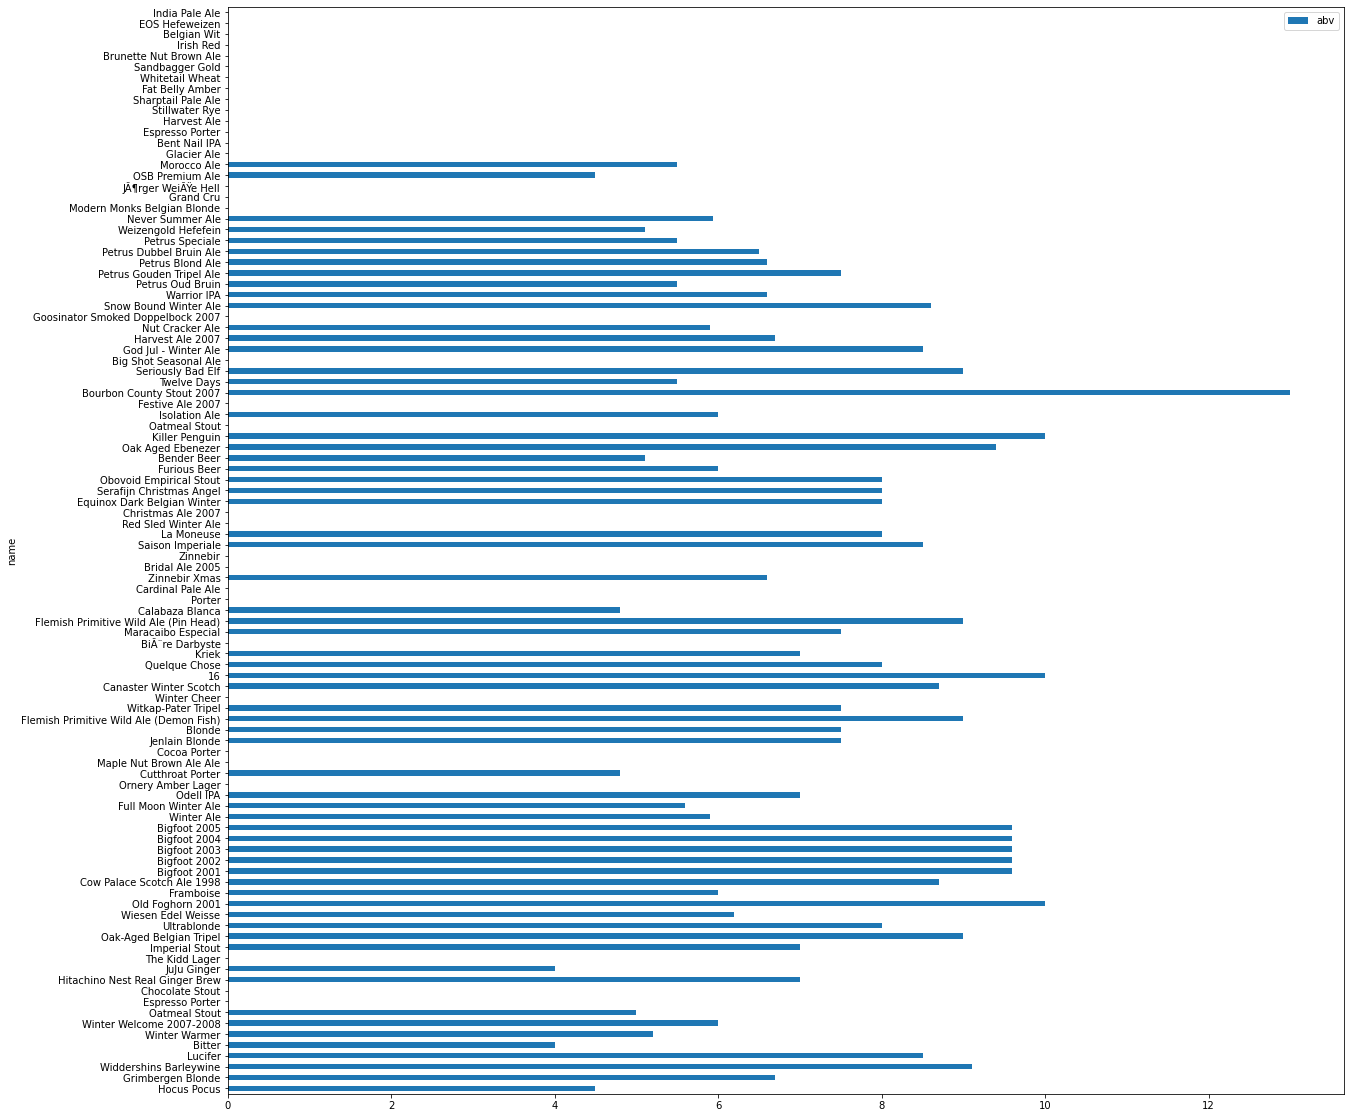

In [30]:
data.plot(kind="barh", x="name", y="abv", figsize=(20,20))

In [31]:
data_sql = pandas.read_sql_table("beer", "sqlite:///beerlog.db", columns=["name", "rate"])

<AxesSubplot:ylabel='name'>

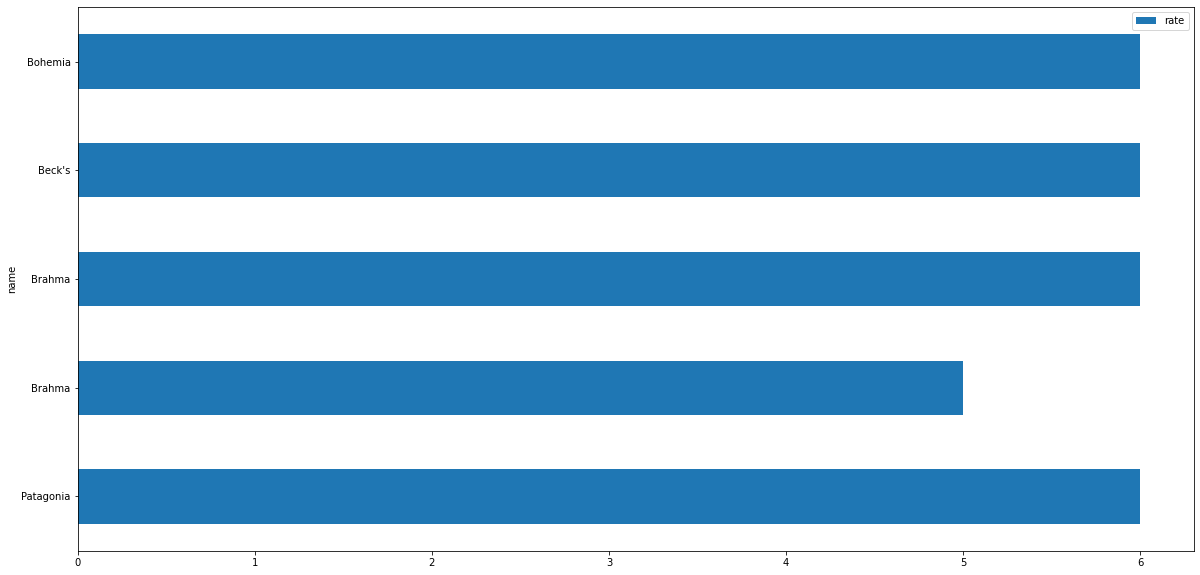

In [34]:
data_sql.plot(kind="barh", x="name", y="rate", figsize=(20,10))

In [35]:
scrapper = pandas.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_beer_consumption_per_capita", attrs={"class": "wikitable"})

In [45]:
table = scrapper[0]
table["Country"] = table["Country"].apply(lambda country: country.upper().replace("*", ""))
table = table.iloc[:, :2]
table

,Country,Consumptionper capita[1](litres per year)
0,CZECH REPUBLIC,140.0
1,AUSTRIA,107.8
2,ROMANIA,100.3
3,GERMANY,99.0
4,POLAND,97.7
...,...,...
56,UGANDA,6.0
57,MALAYSIA,5.8
58,SRI LANKA,2.0
59,INDIA,2.0


<AxesSubplot:ylabel='Country'>

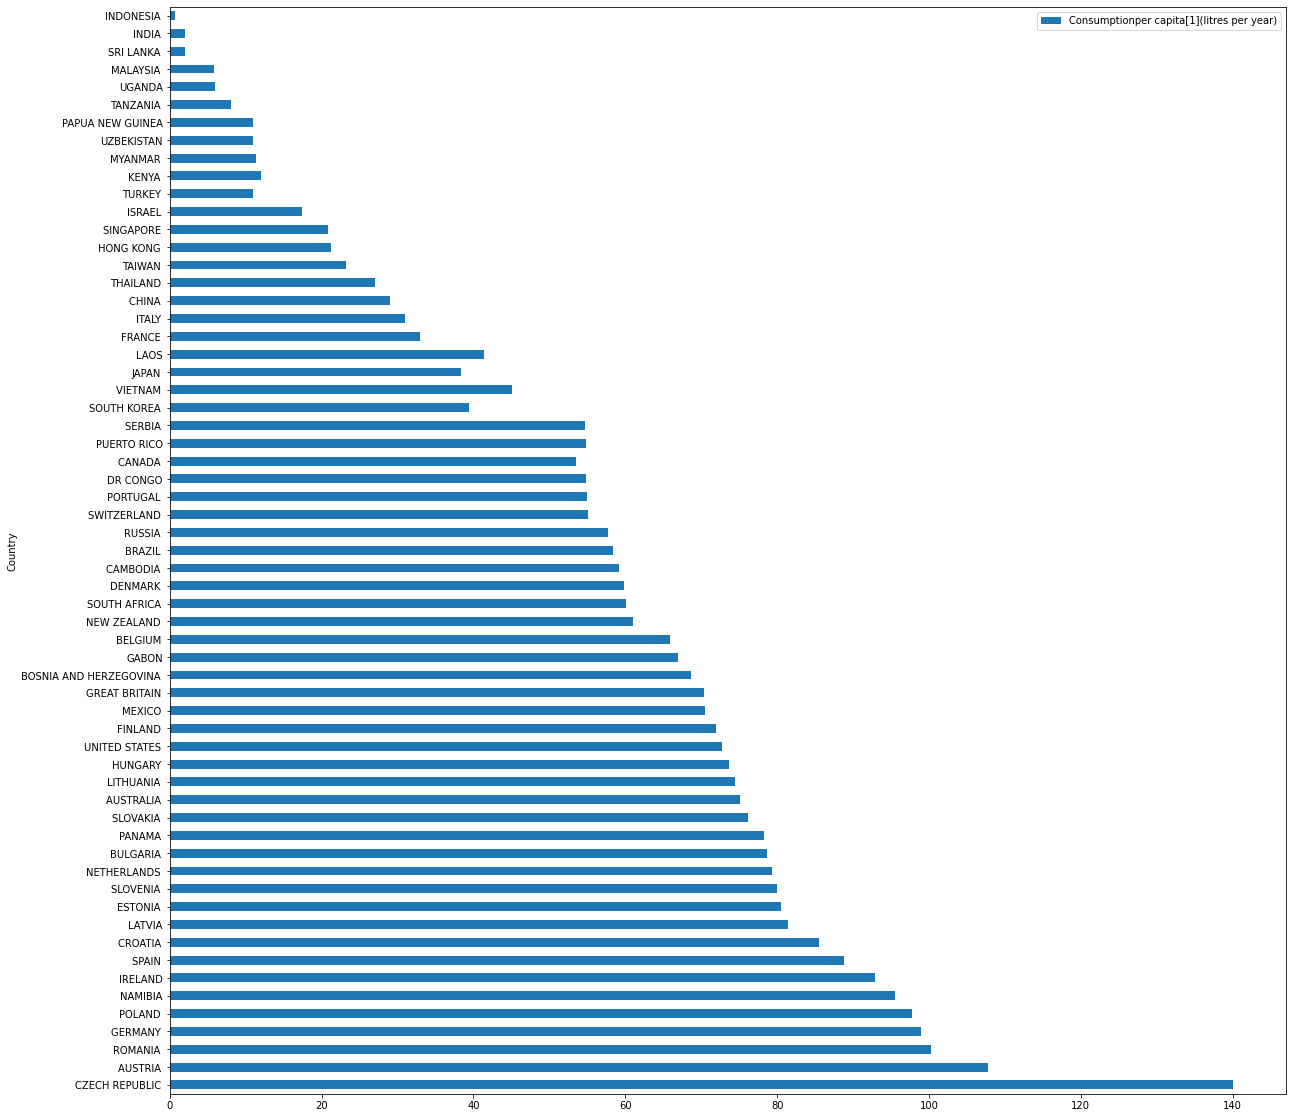

In [46]:
table.plot(kind="barh", x=0, y=1, figsize=(20,20))